In [1]:
import os,sys
# torch 
import torch # pytorch package, allows using GPUs
import torch.nn.functional as F # implements forward and backward definitions of an autograd operation
from torch import nn, optim
from torch.nn.modules import Module
from torchvision import datasets # load data
from torch.autograd import Variable
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using cuda device for all tensor calculations.")
else:
    device = torch.device('cpu')
    print("Using cpu device for all tensor calculations.")

Using cuda device for all tensor calculations.


In [2]:
class plain_model(nn.Module):
    def __init__(self, lin_layers, activation = nn.ReLU(), out_activation = nn.LogSoftmax(dim=1), device=None):
        super().__init__()
        ########### setting up conv layers ###########
        self.layers = nn.ModuleList()
        self.layers.append(nn.Conv2d(1, 32, kernel_size=5))
        self.layers.append(activation)
        self.layers.append(nn.MaxPool2d(2, stride = 2))
        self.layers.append(nn.Conv2d(32, 32, kernel_size=5))
        self.layers.append(activation)
        #self.layers.append(nn.Conv2d(32, 64, kernel_size=1))
        #self.layers.append(activation)
        #self.layers.append(nn.Conv2d(64, 64, kernel_size=1))
        #self.layers.append(activation)
        #self.layers.append(nn.MaxPool2d(2, stride = 2))
        self.layers.append(nn.Flatten())

        layers_full = [256] + lin_layers
        
        ################## FFN ##################  
        # variable number of hidden layers and neurons, controlled by 
        for i, layer in enumerate(lin_layers):
            self.layers.append(nn.Linear(layers_full[i], layer))
            if activation is not None:
                assert isinstance(activation, Module), \
                self.layers.append(activation)
            self.layers.append(nn.BatchNorm1d(layer))

        self.layers.append(nn.Linear(lin_layers[-1], 2))
        
        # only one dropout layer after all BN layers inspired by https://arxiv.org/pdf/1801.05134.pdf (also we have a very low amount of training data)
        #self.layers.append(nn.Dropout(.5))

        self.layers.append(out_activation)
        
        if device == None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device

        self.to(self.device)

    def forward(self, input_data, train=True):
        x = test_tensor = torch.cat((input_data[:, 0, :,:], input_data[:,1, :, :]), 2).unsqueeze(1)
        for layer in self.layers:
            x = layer(x)
        return x

class plain_model2(nn.Module):
    def __init__(self, lin_layers, activation = nn.ReLU(), out_activation = nn.LogSoftmax(dim=1), device=None):
        super().__init__()
        ########### setting up conv layers ###########
        self.ch1 = nn.ModuleList()
        self.ch2 = nn.ModuleList()
        self.layers = nn.ModuleList()
        
        #channel 1
        self.ch1.append(nn.Conv2d(1, 32, kernel_size=3))
        self.ch1.append(activation)
        self.ch1.append(nn.MaxPool2d(kernel_size=(2,2), stride = 2))
        self.ch1.append(nn.Conv2d(32, 32, kernel_size=3))
        self.ch1.append(activation)

        #channel 2
        self.ch2.append(nn.Conv2d(1, 32, kernel_size=3))
        self.ch2.append(activation)
        self.ch2.append(nn.MaxPool2d(kernel_size=(2,2), stride = 2))
        self.ch2.append(nn.Conv2d(32, 32, kernel_size=3))
        self.ch2.append(activation)
    
        #flatten and full connected layers
        self.layers.append(nn.Flatten())

        layers_full = [1024] + lin_layers
        
        ################## FFN ##################  
        # variable number of hidden layers and neurons, controlled by 
        for i, layer in enumerate(lin_layers):
            self.layers.append(nn.Linear(layers_full[i], layer))
            if activation is not None:
                assert isinstance(activation, Module), \
                self.layers.append(activation)

        self.layers.append(nn.Linear(lin_layers[-1], 2))

        self.layers.append(out_activation)
        
        if device == None:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device

        self.to(self.device)

    def forward(self, input_data, train=True):
        x_ch1 = input_data[:, 0, :,:].unsqueeze(1)
        x_ch2 = input_data[:,1, :, :].unsqueeze(1)
        
        for ch_1, ch_2 in zip(self.ch1, self.ch2):
            x_ch1 = ch_1(x_ch1)
            x_ch2 = ch_2(x_ch2)
        x = torch.cat((x_ch1, x_ch2), 1)
        for layer in self.layers:
            x = layer(x)
        return x

In [3]:
from run_training import run_analysis

  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (98.800%), Accuracy(Test): (76.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (47.100%), Accuracy(Test): (49.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.400%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (86.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (97.000%), Accuracy(Test): (82.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (78.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (95.400%), Accuracy(Test): (82.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (87.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (88.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (86.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (51.800%), Accuracy(Test): (52.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (92.300%), Accuracy(Test): (77.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (81.400%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (81.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (99.900%), Accuracy(Test): (84.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (92.700%), Accuracy(Test): (71.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.800%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (90.800%), Accuracy(Test): (79.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (49.800%), Accuracy(Test): (51.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (86.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (51.600%), Accuracy(Test): (50.400%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (80.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (86.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (99.700%), Accuracy(Test): (84.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (48.600%), Accuracy(Test): (48.800%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (86.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (81.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (80.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (87.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (50.300%), Accuracy(Test): (51.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (48.400%), Accuracy(Test): (52.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.800%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (99.100%), Accuracy(Test): (80.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.400%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (52.200%), Accuracy(Test): (51.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (47.700%), Accuracy(Test): (49.400%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (47.900%), Accuracy(Test): (50.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (85.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (94.000%), Accuracy(Test): (81.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (92.500%), Accuracy(Test): (77.200%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (48.600%), Accuracy(Test): (49.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (99.900%), Accuracy(Test): (78.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (82.500%), Accuracy(Test): (70.500%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (82.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (84.300%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (50.800%), Accuracy(Test): (52.100%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (50.500%), Accuracy(Test): (50.700%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (51.200%), Accuracy(Test): (51.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (56.800%), Accuracy(Test): (52.600%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (80.000%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (83.900%)
ran for a total of 50 epochs

 



  0%|          | 0/50 [00:00<?, ?it/s]

[Final Result] Accuracy(Training): (100.000%), Accuracy(Test): (86.600%)
ran for a total of 50 epochs

 

Line2D(_child0) Line2D(_child1) Line2D(_child2) <matplotlib.collections.PolyCollection object at 0x7f58c6498ee0>


/home/rudi/Documents/Uni/Courses-Exchange/DeepLearning/Final_Project/Project_1/Visualization.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


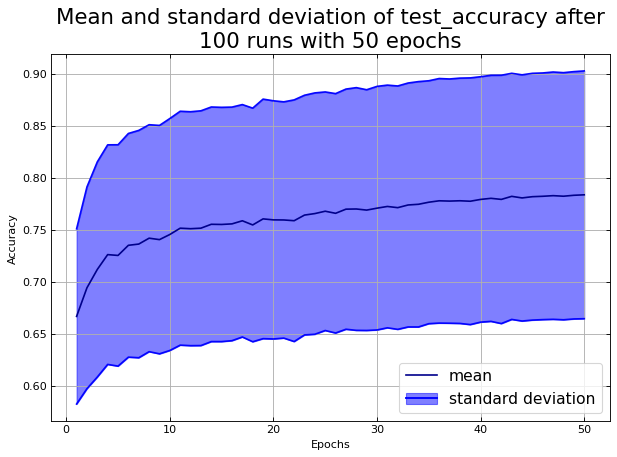

In [4]:
run_analysis(plain_model2, 100, 50, [64, 64, 32], device, lr=.01)